In [4]:
%load_ext autoreload
%autoreload 1
%aimport src
%aimport src.utils
%aimport src.SdmIsmAnalysis
%aimport src.SimpleSynthesis

# display last assigned variable automatically
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

%matplotlib inline
from matplotlib.pyplot import *

from src.utils import mygrid

import seaborn as sns
import polars as pl
import numpy as np
import scipy
from pathlib import Path

import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
rooms = ["HL05W", "HL06W"]

listeners = [
    "0.0X_0.0Y",
    "3.0X_2.0Y",
    "1.75X_-2.0Y",
    "-1.75X_-3.0Y",  # lower right corner in floor plan
    "-1.25X_0.0Y",
]

sources = range(5)

range(0, 5)

In [6]:
main_path = Path("../data/processed/analysis_e10_full_run2")

WindowsPath('../data/processed/analysis_e10_full_run2')

In [7]:
counter = 0
presynth_dfs = []
quality_dfs = []

for room in rooms:
    for from_listener in listeners:
        for from_source in sources:
            from_name = f"{room}_{from_listener}_{from_source}SRC"
            from_path = main_path / from_name
            print(from_path)
            new_df = pl.read_parquet(from_path / "runs.parquet").with_row_index("index").with_columns(room=pl.lit(room), from_listener=pl.lit(from_listener), from_source=pl.lit(from_source))
            presynth_dfs.append(new_df)
            for to_listener in listeners:
                for to_source in sources:
                    save_path = from_path / "extrapolation_quality2"
                    to_name = f"{room}_{to_listener}_{to_source}SRC"
                    new_df = pl.read_parquet(save_path / to_name).with_columns(room=pl.lit(room), from_listener=pl.lit(from_listener), from_source=pl.lit(from_source), to_listener=pl.lit(to_listener), to_source=pl.lit(to_source))
                    quality_dfs.append(new_df)
                    counter += 1
presynth = pl.concat(presynth_dfs, how="diagonal")
quality = pl.concat(quality_dfs, how="diagonal")
print(counter)

..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_0SRC
..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_1SRC
..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_2SRC
..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_3SRC
..\data\processed\analysis_e10_full_run2\HL05W_0.0X_0.0Y_4SRC
..\data\processed\analysis_e10_full_run2\HL05W_3.0X_2.0Y_0SRC
..\data\processed\analysis_e10_full_run2\HL05W_3.0X_2.0Y_1SRC
..\data\processed\analysis_e10_full_run2\HL05W_3.0X_2.0Y_2SRC
..\data\processed\analysis_e10_full_run2\HL05W_3.0X_2.0Y_3SRC
..\data\processed\analysis_e10_full_run2\HL05W_3.0X_2.0Y_4SRC
..\data\processed\analysis_e10_full_run2\HL05W_1.75X_-2.0Y_0SRC
..\data\processed\analysis_e10_full_run2\HL05W_1.75X_-2.0Y_1SRC
..\data\processed\analysis_e10_full_run2\HL05W_1.75X_-2.0Y_2SRC
..\data\processed\analysis_e10_full_run2\HL05W_1.75X_-2.0Y_3SRC
..\data\processed\analysis_e10_full_run2\HL05W_1.75X_-2.0Y_4SRC
..\data\processed\analysis_e10_full_run2\HL05W_-1.75X_-3.0Y_

In [8]:
quality

rmse,lag,lag_std,lag_rms,xcorr,xcorr_std,level_delta,level_rms,misdistributed_energy,t30_rel_delta,t30_rel_rms,c20_delta,c20_rms,iacc_delta,iacc_rms,lag_iacc_delta,lag_iacc_rms,ild_delta,ild_rms,spectral_difference,condition,room,from_listener,from_source,to_listener,to_source
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,i32,str,i32
-1.438283,0.0,0.5,0.5,0.685015,0.066863,0.143752,0.444134,0.027252,-0.010375,0.011302,0.172831,0.834144,0.00278,0.020349,-2.333333,9.617692,0.113591,0.678202,0.188265,"""filtered""","""HL05W""","""0.0X_0.0Y""",0,"""0.0X_0.0Y""",0
-1.438283,0.0,0.5,0.5,0.685015,0.066863,0.143752,0.444134,0.027252,-0.010375,0.011302,0.172831,0.834144,0.00278,0.020349,-2.333333,9.617692,0.113591,0.678202,0.188265,"""ds_only""","""HL05W""","""0.0X_0.0Y""",0,"""0.0X_0.0Y""",0
2.718096,-62.833333,338.440623,344.223885,0.456719,0.227253,-0.884549,2.448872,0.278181,0.006536,0.035116,-2.273915,4.344752,0.05467,0.093666,0.25,0.5,0.082501,3.706416,0.343361,"""filtered""","""HL05W""","""0.0X_0.0Y""",0,"""0.0X_0.0Y""",1
2.866544,-121.666667,213.453872,245.693576,0.456401,0.212641,-0.268677,1.144871,0.240972,-0.00218,0.030796,-2.223078,4.380611,0.013435,0.046935,0.25,0.5,0.264111,1.940819,0.304042,"""ds_only""","""HL05W""","""0.0X_0.0Y""",0,"""0.0X_0.0Y""",1
3.360061,-246.583333,383.265565,455.736583,0.235961,0.269606,-0.230258,2.239835,0.30351,-0.063307,0.06753,-6.176316,7.930573,-0.025402,0.063291,-6.166667,22.353225,0.335964,3.243537,0.56735,"""filtered""","""HL05W""","""0.0X_0.0Y""",0,"""0.0X_0.0Y""",2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3.285503,-191.583333,178.021281,261.525811,0.079605,0.199456,-0.06316,1.443071,0.813682,null,null,null,null,-0.00943,0.151125,4.583333,26.82505,-0.052096,2.220395,0.835855,"""ds_only""","""HL06W""","""-1.25X_0.0Y""",4,"""-1.25X_0.0Y""",2
1.845068,-87.875,198.460599,217.045214,0.247984,0.178208,-3.696285,4.601122,0.256611,-0.031218,0.051416,-0.146766,3.124061,0.053006,0.073144,5.0,20.416497,-0.276308,5.167327,0.593772,"""filtered""","""HL06W""","""-1.25X_0.0Y""",4,"""-1.25X_0.0Y""",3
2.055215,-171.583333,207.843274,269.51747,0.123211,0.269559,-2.686645,3.53091,0.308831,-0.047834,0.056394,0.467346,2.24456,0.023638,0.052949,1.0,21.007935,-0.417743,4.460944,0.679868,"""ds_only""","""HL06W""","""-1.25X_0.0Y""",4,"""-1.25X_0.0Y""",3


# Invalid Values

In [9]:
quality.fill_nan(None).null_count()

rmse,lag,lag_std,lag_rms,xcorr,xcorr_std,level_delta,level_rms,misdistributed_energy,t30_rel_delta,t30_rel_rms,c20_delta,c20_rms,iacc_delta,iacc_rms,lag_iacc_delta,lag_iacc_rms,ild_delta,ild_rms,spectral_difference,condition,room,from_listener,from_source,to_listener,to_source
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,803,803,723,723,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
quality.select(pl.exclude("condition", "room", "from_listener", "to_listener").is_finite().not_().value_counts())

rmse,lag,lag_std,lag_rms,xcorr,xcorr_std,level_delta,level_rms,misdistributed_energy,t30_rel_delta,t30_rel_rms,c20_delta,c20_rms,iacc_delta,iacc_rms,lag_iacc_delta,lag_iacc_rms,ild_delta,ild_rms,spectral_difference,from_source,to_source
struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2],struct[2]
"{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,1667}","{false,1667}","{null,397}","{true,326}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}"
"{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{true,436}","{null,397}","{true,326}","{false,1777}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}"
"{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{null,397}","{true,436}","{false,1777}","{null,397}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}","{false,2500}"


436 T30 are non-finite, 397 are null. 326 C20 are non-finite, 397 are null. That's a lot...

These problems probably come from LF oscillations, at least that's what I've seen so far. All these values have to be excluded because how can we trust any measure if that LF oscillation is present. 

In [89]:
id_cols = ["condition", "room", "from_listener", "from_source", "to_listener", "to_source"]

['condition',
 'room',
 'from_listener',
 'from_source',
 'to_listener',
 'to_source']

In [90]:
quality_metrics = [
    "xcorr_inv_add",
    "rmse_lin",
    "lag_rms",
    "level_rms",
    'misdistributed_energy',
    't30_rel_rms',
    'c20_rms',
    'iacc_rms',
    'lag_iacc_rms',
    'ild_rms',
    'spectral_difference',
]

['xcorr_inv_add',
 'rmse_lin',
 'lag_rms',
 'level_rms',
 'misdistributed_energy',
 't30_rel_rms',
 'c20_rms',
 'iacc_rms',
 'lag_iacc_rms',
 'ild_rms',
 'spectral_difference']

In [121]:
cleaned = quality.fill_nan(None).drop_nulls().filter(
    pl.col("t30_rel_rms").is_finite(), pl.col("c20_rms").is_finite()
).group_by([ # ensure each condition is present for each group
    'room',
    'from_listener',
    'from_source',
    'to_listener',
    'to_source'
]).agg(
    "*",
    count=pl.col("lag_rms").count()
).filter(
    pl.col("count") == 2 # ensure both conditions are present
).select(
    pl.exclude("count")
).explode(pl.exclude([
    'room',
    'from_listener',
    'from_source',
    'to_listener',
    'to_source'
]))

room,from_listener,from_source,to_listener,to_source,rmse,lag,lag_std,lag_rms,xcorr,xcorr_std,level_delta,level_rms,misdistributed_energy,t30_rel_delta,t30_rel_rms,c20_delta,c20_rms,iacc_delta,iacc_rms,lag_iacc_delta,lag_iacc_rms,ild_delta,ild_rms,spectral_difference,condition
str,str,i32,str,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1,2.808592,86.0,177.829506,197.53312,0.214443,0.193053,-0.851865,2.407952,0.352298,0.179935,0.186601,0.358289,2.18626,0.304627,0.310963,7.583333,17.370953,0.065026,3.645667,0.916232,"""filtered"""
"""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1,2.290614,14.0,36.275566,38.883373,0.368648,0.140198,-1.77578,2.041474,0.221661,0.190907,0.195731,-0.940839,1.625149,0.021622,0.083205,10.416667,22.99094,-0.025487,1.056389,0.360898,"""ds_only"""
"""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1,2.690937,-1.791667,0.406116,1.837117,0.455847,0.177265,-0.246953,1.617723,0.137294,-0.045543,0.051633,1.416287,2.542919,0.165995,0.184789,0.25,0.5,0.254397,2.657195,0.376787,"""filtered"""
"""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1,3.320775,13.208333,50.164711,51.874448,0.380663,0.252553,0.569776,2.493438,0.226055,-0.053495,0.059802,2.0336,3.816733,0.053055,0.154061,-0.666667,2.915476,0.393586,3.920944,0.434476,"""ds_only"""
"""HL06W""","""1.75X_-2.0Y""",0,"""1.75X_-2.0Y""",2,2.986472,4.625,2.016856,5.045625,0.502274,0.257411,0.230218,1.33915,0.176754,5.023129,5.068185,1.557148,3.505465,-0.081114,0.094101,0.166667,0.816497,0.046196,2.201674,0.557082,"""filtered"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""HL06W""","""1.75X_-2.0Y""",0,"""3.0X_2.0Y""",3,2.370574,24.125,178.84754,180.467333,0.052516,0.203781,-1.668483,1.832652,0.228063,0.266828,0.27455,-0.346379,1.210508,-0.061189,0.072662,-7.833333,36.954928,-0.261264,1.375409,0.463373,"""ds_only"""
"""HL05W""","""-1.75X_-3.0Y""",1,"""-1.75X_-3.0Y""",2,1.92043,-11.541667,128.957674,129.473131,0.164743,0.098517,-2.261978,2.346638,0.217703,-0.189293,0.191689,-1.045231,1.301898,-0.17379,0.190084,-0.75,13.238202,0.046581,1.138362,0.751736,"""filtered"""
"""HL05W""","""-1.75X_-3.0Y""",1,"""-1.75X_-3.0Y""",2,2.075509,-65.958333,150.254639,164.094358,0.125555,0.111273,-1.61481,1.727406,0.216889,-0.196452,0.199789,-0.149658,1.163864,-0.181419,0.205696,9.333333,23.576118,0.119648,0.461094,0.72766,"""ds_only"""


# Transform and Select Quality Metrics

In [122]:
selected = cleaned.with_columns(
    xcorr_inv_add = 1 - pl.col("xcorr"),
    rmse_lin = 10 ** (pl.col("rmse")/20)
).select(*quality_metrics, *id_cols)

xcorr_inv_add,rmse_lin,lag_rms,level_rms,misdistributed_energy,t30_rel_rms,c20_rms,iacc_rms,lag_iacc_rms,ild_rms,spectral_difference,condition,room,from_listener,from_source,to_listener,to_source
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,i32,str,i32
0.785557,1.38175,197.53312,2.407952,0.352298,0.186601,2.18626,0.310963,17.370953,3.645667,0.916232,"""filtered""","""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1
0.631352,1.301759,38.883373,2.041474,0.221661,0.195731,1.625149,0.083205,22.99094,1.056389,0.360898,"""ds_only""","""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1
0.544153,1.36316,1.837117,1.617723,0.137294,0.051633,2.542919,0.184789,0.5,2.657195,0.376787,"""filtered""","""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1
0.619337,1.465679,51.874448,2.493438,0.226055,0.059802,3.816733,0.154061,2.915476,3.920944,0.434476,"""ds_only""","""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1
0.497726,1.410339,5.045625,1.33915,0.176754,5.068185,3.505465,0.094101,0.816497,2.201674,0.557082,"""filtered""","""HL06W""","""1.75X_-2.0Y""",0,"""1.75X_-2.0Y""",2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.947484,1.313798,180.467333,1.832652,0.228063,0.27455,1.210508,0.072662,36.954928,1.375409,0.463373,"""ds_only""","""HL06W""","""1.75X_-2.0Y""",0,"""3.0X_2.0Y""",3
0.835257,1.247445,129.473131,2.346638,0.217703,0.191689,1.301898,0.190084,13.238202,1.138362,0.751736,"""filtered""","""HL05W""","""-1.75X_-3.0Y""",1,"""-1.75X_-3.0Y""",2
0.874445,1.269917,164.094358,1.727406,0.216889,0.199789,1.163864,0.205696,23.576118,0.461094,0.72766,"""ds_only""","""HL05W""","""-1.75X_-3.0Y""",1,"""-1.75X_-3.0Y""",2


# Apply Model

In [123]:
objective_model_features = np.load("objective_model_features.npy")

array(['lag_rms', 'level_rms', 'misdistributed_energy', 'ild_rms',
       'rmse_lin'], dtype='<U21')

In [124]:
with open("objective_model.pkl", "rb") as f:
    objective_model = pickle.load(f)

In [125]:
objective_model

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Ridge(alpha=0.8858667904100825))])

In [126]:
with_model = selected.with_columns(
    neg_mushra_model = -objective_model.predict(selected[objective_model_features])
)

xcorr_inv_add,rmse_lin,lag_rms,level_rms,misdistributed_energy,t30_rel_rms,c20_rms,iacc_rms,lag_iacc_rms,ild_rms,spectral_difference,condition,room,from_listener,from_source,to_listener,to_source,neg_mushra_model
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,i32,str,i32,f64
0.785557,1.38175,197.53312,2.407952,0.352298,0.186601,2.18626,0.310963,17.370953,3.645667,0.916232,"""filtered""","""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1,-47.385587
0.631352,1.301759,38.883373,2.041474,0.221661,0.195731,1.625149,0.083205,22.99094,1.056389,0.360898,"""ds_only""","""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1,-56.355432
0.544153,1.36316,1.837117,1.617723,0.137294,0.051633,2.542919,0.184789,0.5,2.657195,0.376787,"""filtered""","""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1,-62.054135
0.619337,1.465679,51.874448,2.493438,0.226055,0.059802,3.816733,0.154061,2.915476,3.920944,0.434476,"""ds_only""","""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1,-56.172647
0.497726,1.410339,5.045625,1.33915,0.176754,5.068185,3.505465,0.094101,0.816497,2.201674,0.557082,"""filtered""","""HL06W""","""1.75X_-2.0Y""",0,"""1.75X_-2.0Y""",2,-63.094586
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.947484,1.313798,180.467333,1.832652,0.228063,0.27455,1.210508,0.072662,36.954928,1.375409,0.463373,"""ds_only""","""HL06W""","""1.75X_-2.0Y""",0,"""3.0X_2.0Y""",3,-59.568196
0.835257,1.247445,129.473131,2.346638,0.217703,0.191689,1.301898,0.190084,13.238202,1.138362,0.751736,"""filtered""","""HL05W""","""-1.75X_-3.0Y""",1,"""-1.75X_-3.0Y""",2,-56.455358
0.874445,1.269917,164.094358,1.727406,0.216889,0.199789,1.163864,0.205696,23.576118,0.461094,0.72766,"""ds_only""","""HL05W""","""-1.75X_-3.0Y""",1,"""-1.75X_-3.0Y""",2,-59.232207


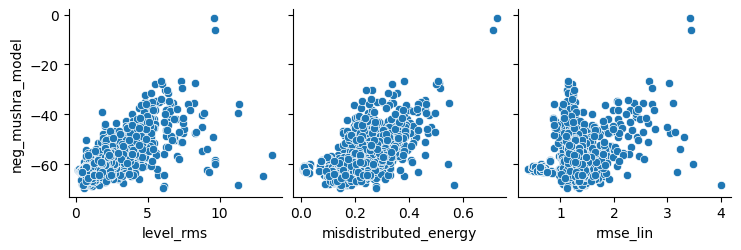

In [127]:
sns.pairplot(
    with_model.to_pandas(), x_vars=["level_rms", "misdistributed_energy", "rmse_lin"], y_vars="neg_mushra_model"
)

# Visualize

In [128]:
melted = with_model.melt(
    id_cols
)

condition,room,from_listener,from_source,to_listener,to_source,variable,value
str,str,str,i32,str,i32,str,f64
"""filtered""","""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1,"""xcorr_inv_add""",0.785557
"""ds_only""","""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1,"""xcorr_inv_add""",0.631352
"""filtered""","""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1,"""xcorr_inv_add""",0.544153
"""ds_only""","""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1,"""xcorr_inv_add""",0.619337
"""filtered""","""HL06W""","""1.75X_-2.0Y""",0,"""1.75X_-2.0Y""",2,"""xcorr_inv_add""",0.497726
…,…,…,…,…,…,…,…
"""ds_only""","""HL06W""","""1.75X_-2.0Y""",0,"""3.0X_2.0Y""",3,"""neg_mushra_mod…",-59.568196
"""filtered""","""HL05W""","""-1.75X_-3.0Y""",1,"""-1.75X_-3.0Y""",2,"""neg_mushra_mod…",-56.455358
"""ds_only""","""HL05W""","""-1.75X_-3.0Y""",1,"""-1.75X_-3.0Y""",2,"""neg_mushra_mod…",-59.232207


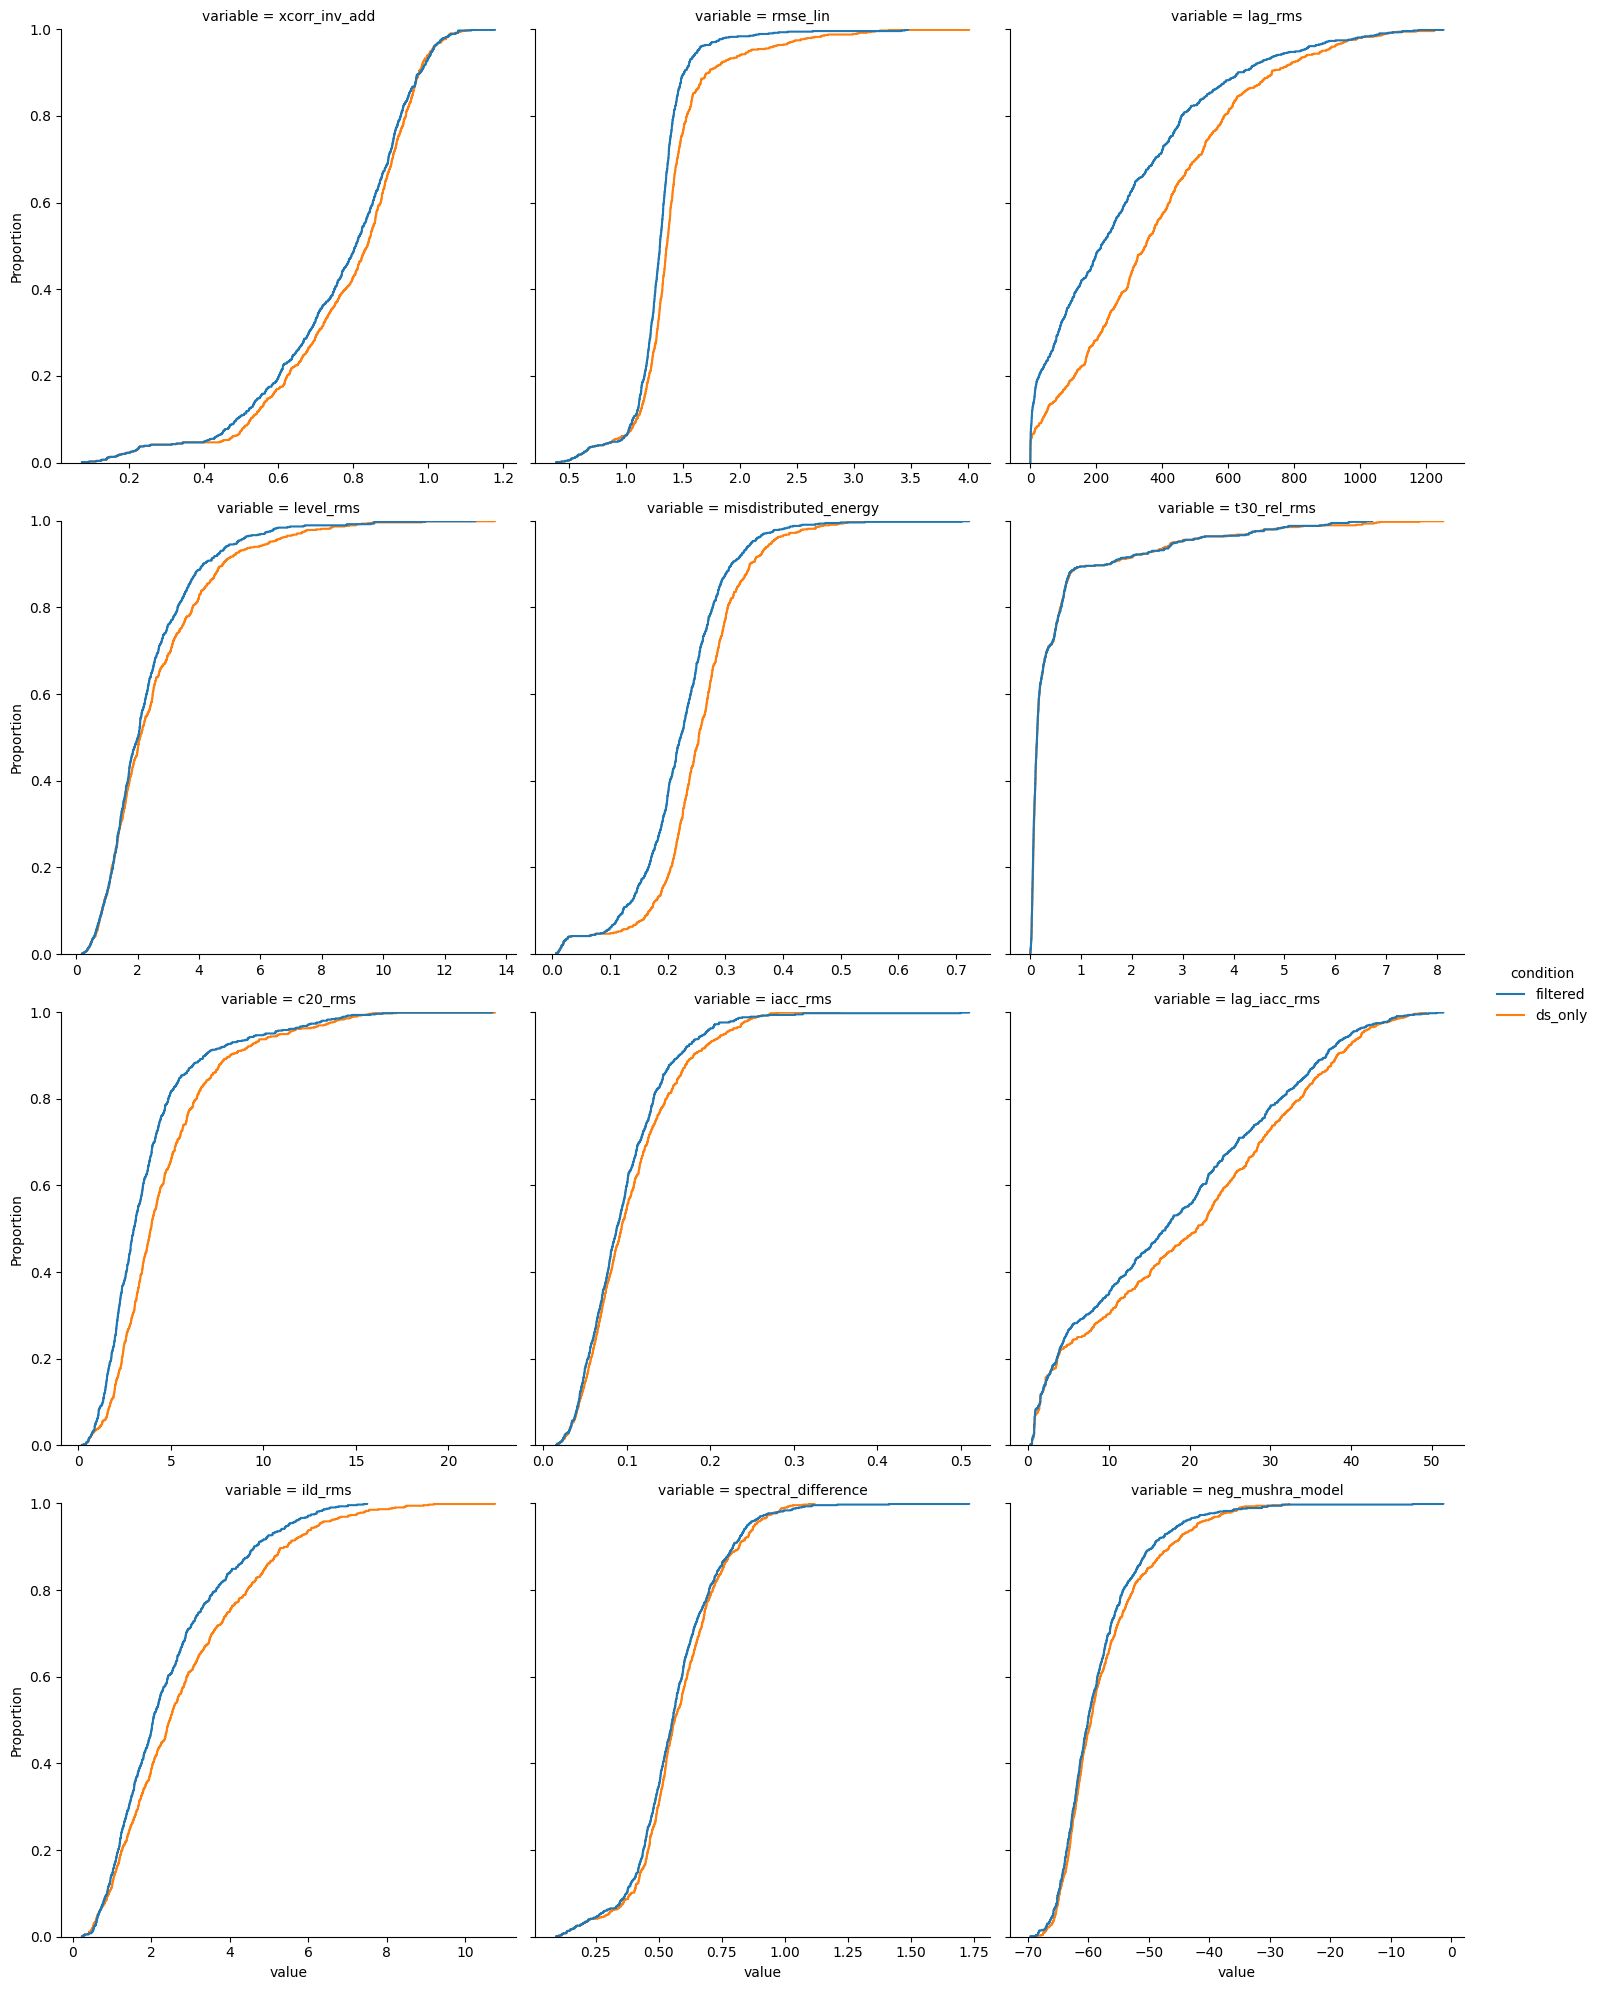

In [223]:
sns.displot(
    melted,
    x = "value",
    col="variable",
    col_wrap=3,
    hue="condition",
    kind="ecdf",
    facet_kws=dict(sharex=False),
)

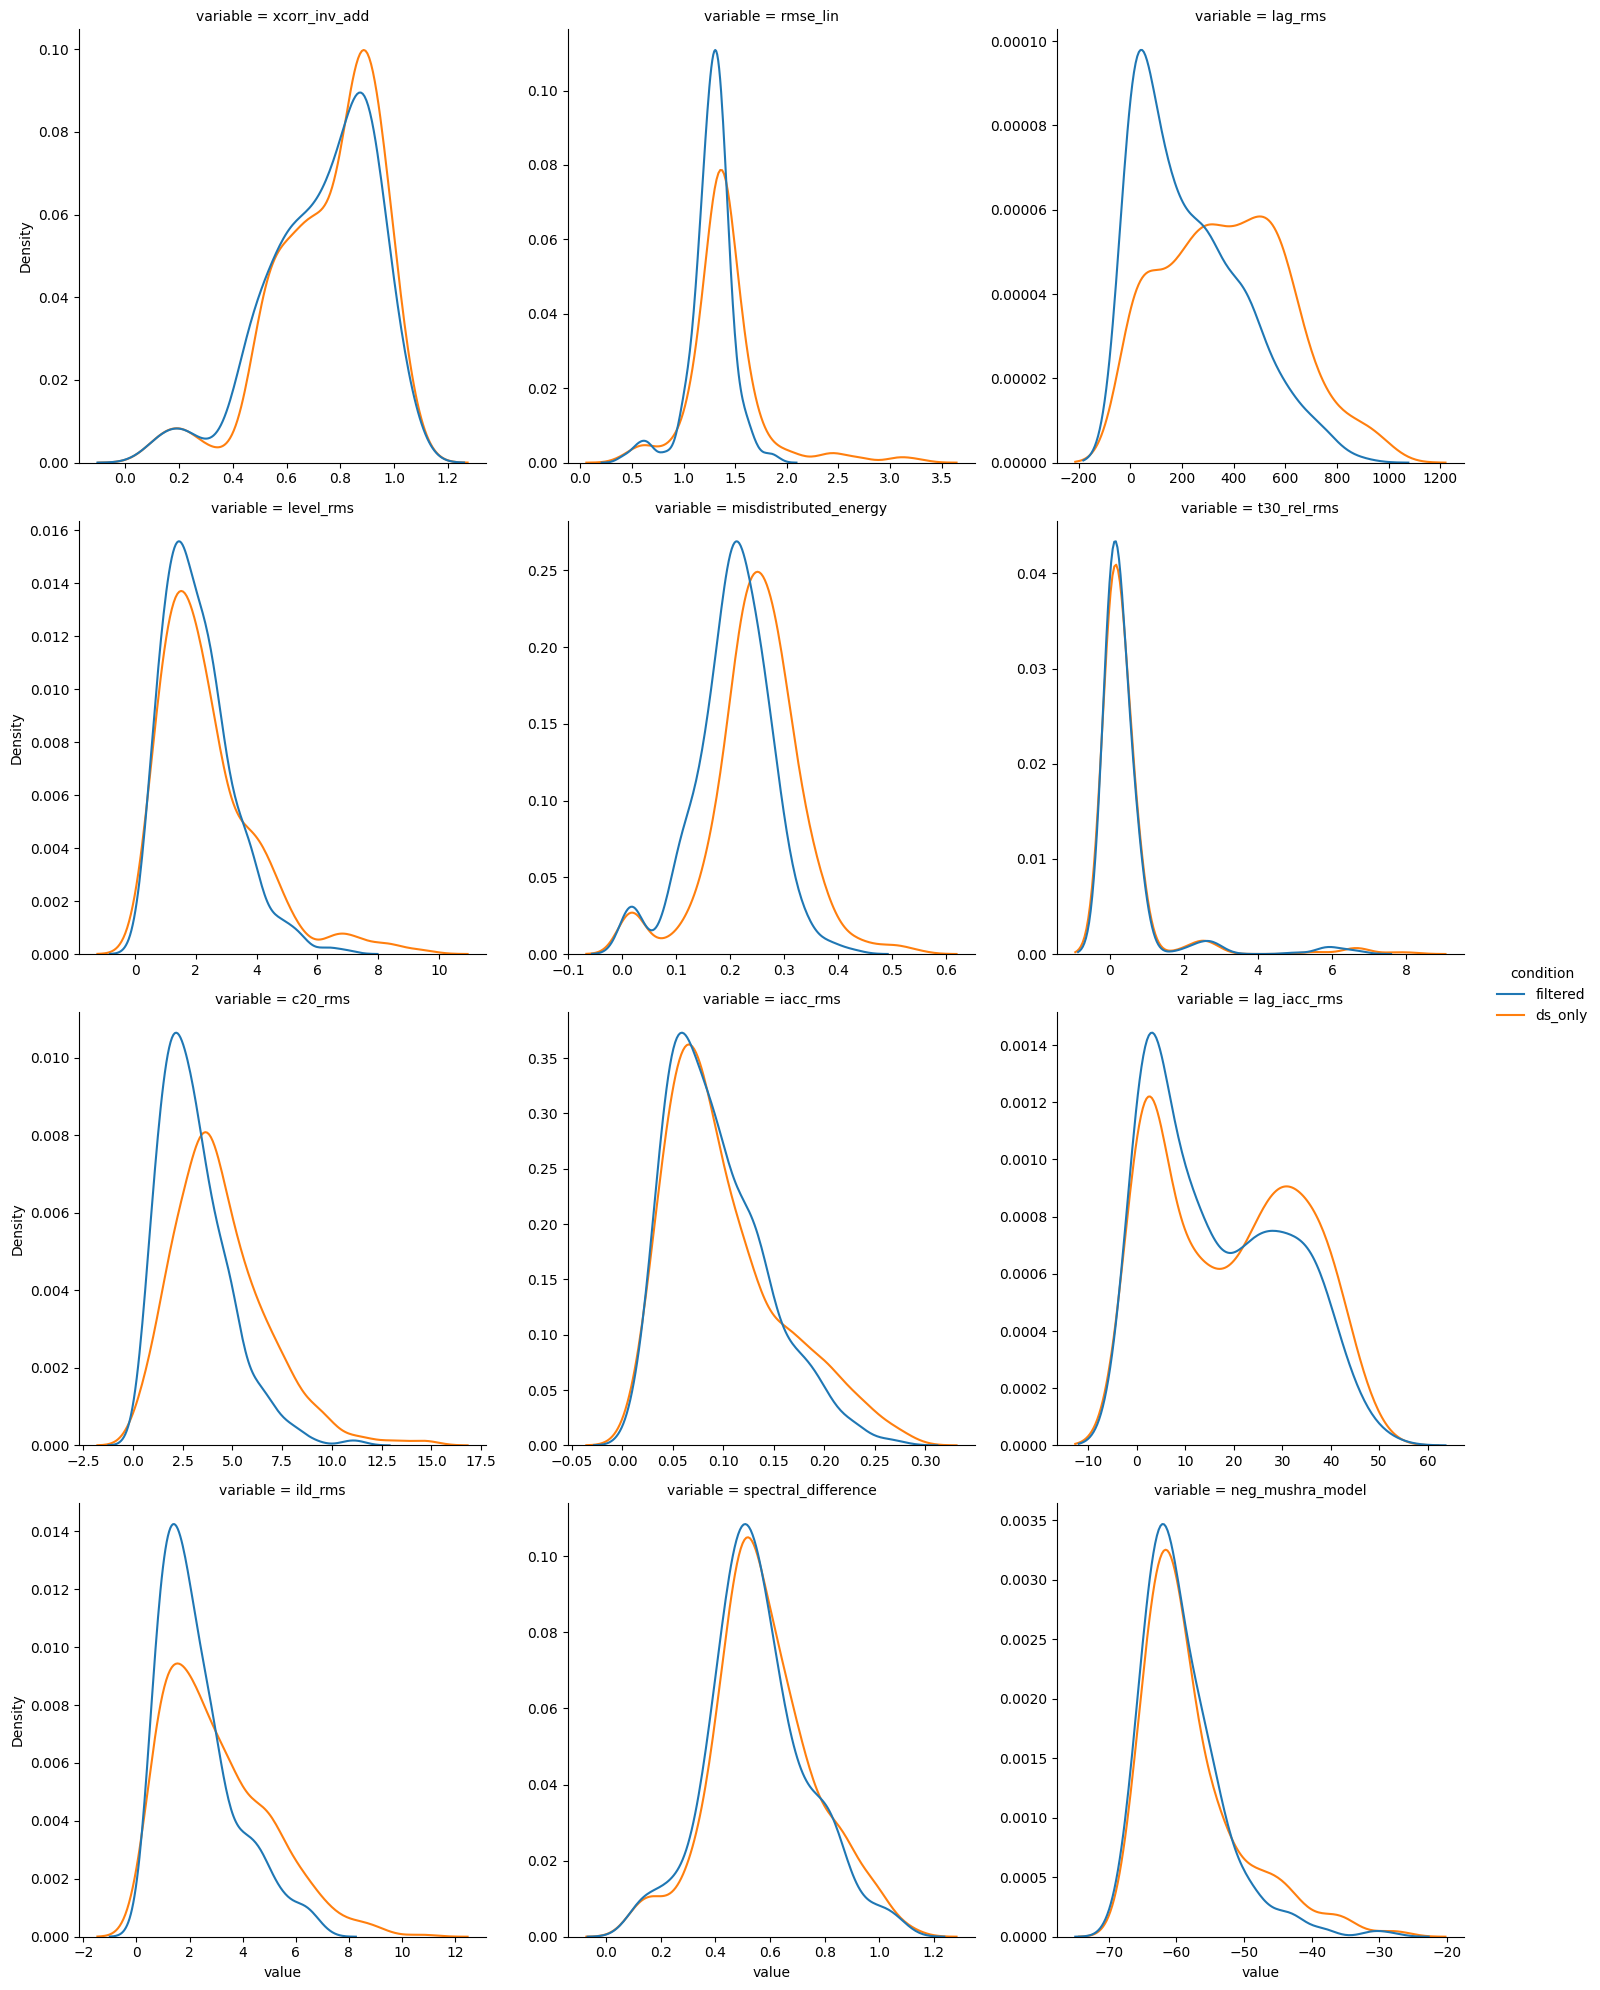

In [224]:
sns.displot(
    melted.filter(pl.col("room") == "HL05W"),
    x = "value",
    col="variable",
    col_wrap=3,
    hue="condition",
    kind="kde",
    facet_kws=dict(sharex=False, sharey=False),
)

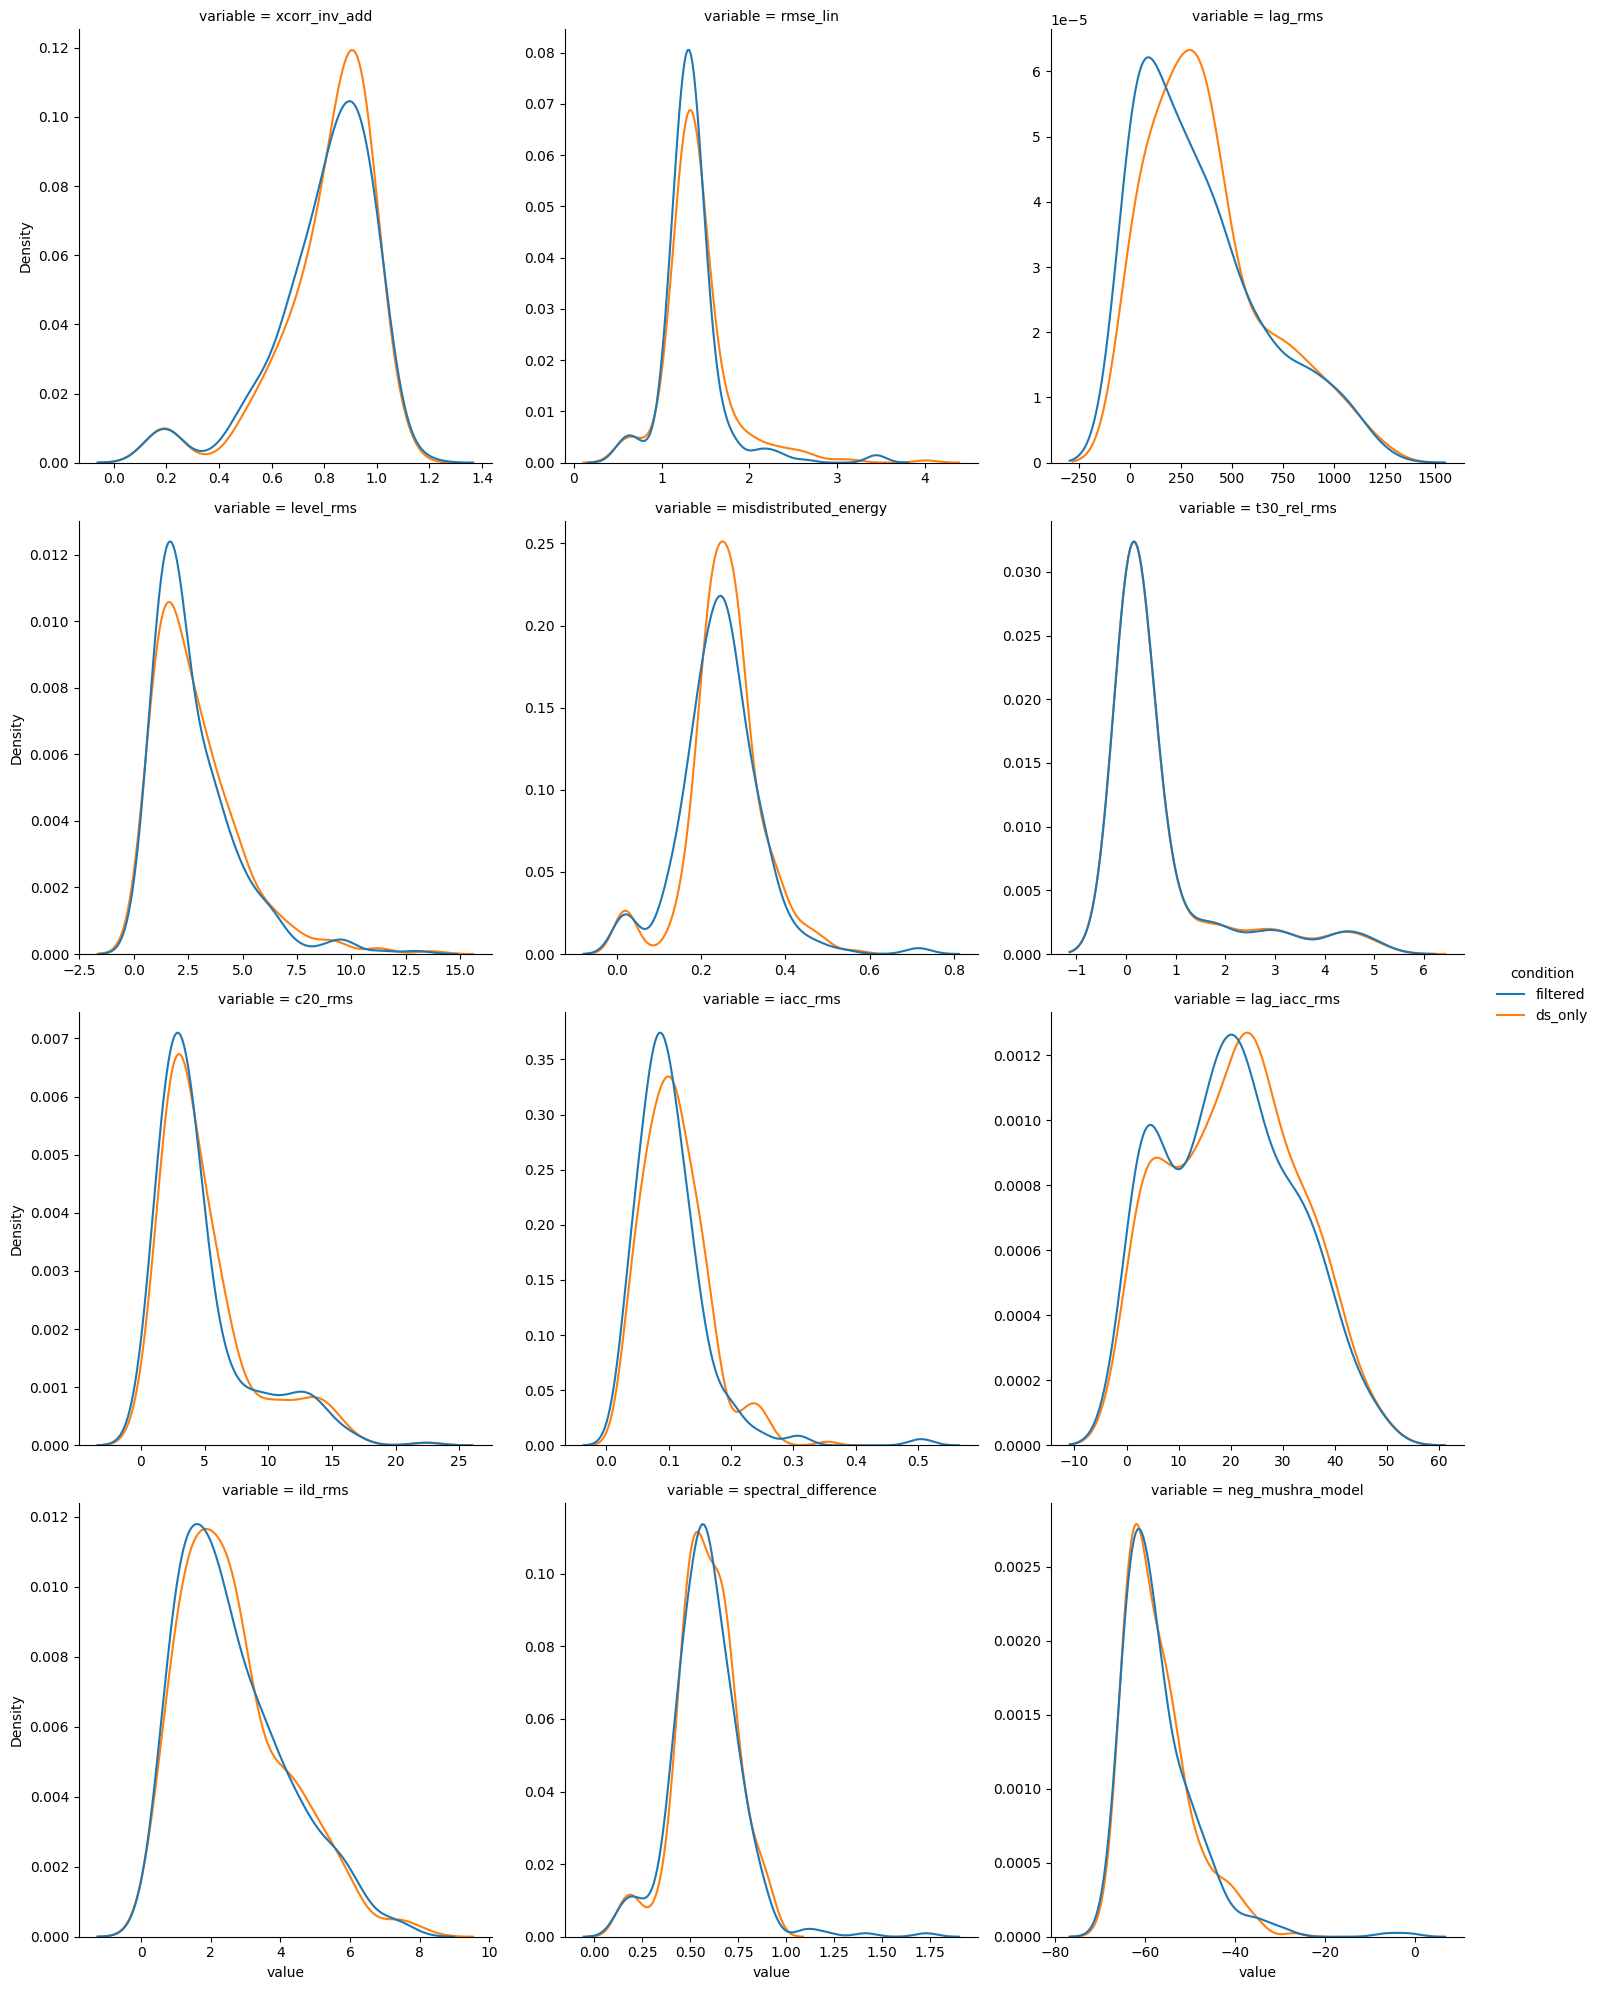

In [225]:
sns.displot(
    melted.filter(pl.col("room") == "HL06W"),
    x = "value",
    col="variable",
    col_wrap=3,
    hue="condition",
    kind="kde",
    facet_kws=dict(sharex=False, sharey=False),
)

Small differences in favor of my method compared to DS only.

Let's look at pairwise relationships:

In [130]:
semi_melted = melted.pivot(
        values=["value"],
        columns=["condition"],
        index=["room",	"from_listener",	"from_source",	"to_listener",	"to_source",	"variable"]
    ).with_columns(
        delta = pl.col("filtered") - pl.col("ds_only")
).drop_nulls() # There's about 700 cases where filtered/ds_only don't exist when the other one does

room,from_listener,from_source,to_listener,to_source,variable,filtered,ds_only,delta
str,str,i32,str,i32,str,f64,f64,f64
"""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1,"""xcorr_inv_add""",0.785557,0.631352,0.154206
"""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1,"""xcorr_inv_add""",0.544153,0.619337,-0.075184
"""HL06W""","""1.75X_-2.0Y""",0,"""1.75X_-2.0Y""",2,"""xcorr_inv_add""",0.497726,0.467401,0.030325
"""HL06W""","""-1.75X_-3.0Y""",4,"""-1.75X_-3.0Y""",4,"""xcorr_inv_add""",0.164979,0.164979,0.0
"""HL05W""","""-1.75X_-3.0Y""",1,"""1.75X_-2.0Y""",4,"""xcorr_inv_add""",0.894126,0.901668,-0.007542
…,…,…,…,…,…,…,…,…
"""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",4,"""neg_mushra_mod…",-52.881187,-52.393293,-0.487895
"""HL06W""","""0.0X_0.0Y""",2,"""1.75X_-2.0Y""",3,"""neg_mushra_mod…",-64.439684,-64.412105,-0.027579
"""HL06W""","""1.75X_-2.0Y""",0,"""3.0X_2.0Y""",3,"""neg_mushra_mod…",-56.897758,-59.568196,2.670438


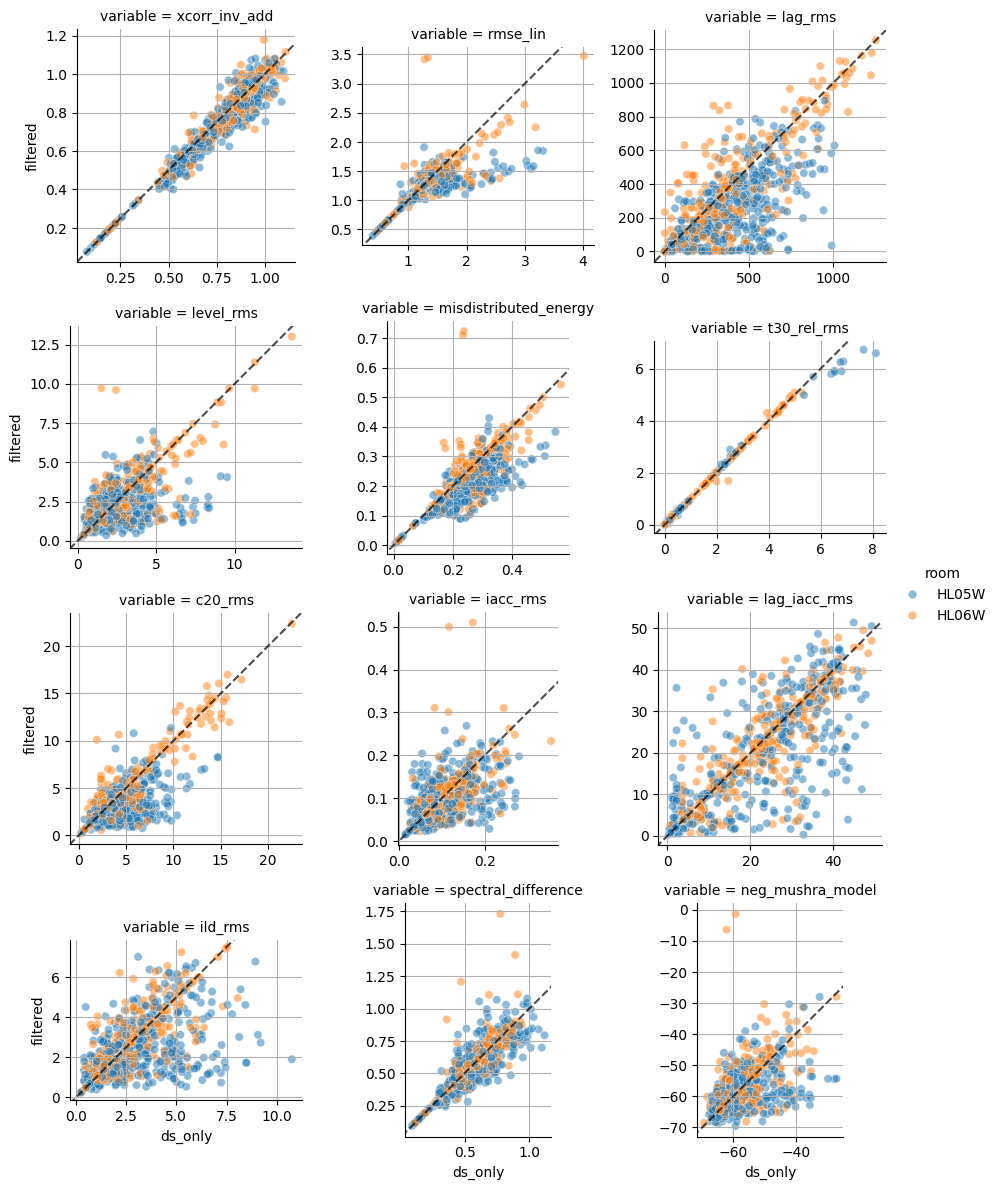

In [131]:
sns.relplot(
    semi_melted,
    y = "filtered",
    x = "ds_only",
    col="variable",
    col_wrap=3,
    hue="room",
    facet_kws=dict(sharex=False, sharey=False),
    alpha=.5,
    height=3,
    hue_order=["HL05W", "HL06W"]
)
for ax in gcf().get_axes():
    ax.grid(True)
    ax.set_aspect("equal")
    ax.autoscale(False)
    ax.plot([-1e4, 1e4], [-1e4, 1e4], color="black", alpha=.7, linestyle="--")

The pairwise comparison of DS only and the filtered extrapolations shows small but clear improvements of the extrapolation in rmse, lag, misdistributed energy, C20 and ILD. The other variables don't show clear differences, i.e. values below the 1:1-line. The performance of extrapolation compared to DS only is generally better in HL05W than in HL06W, as expected. 

# Difference in each individual case

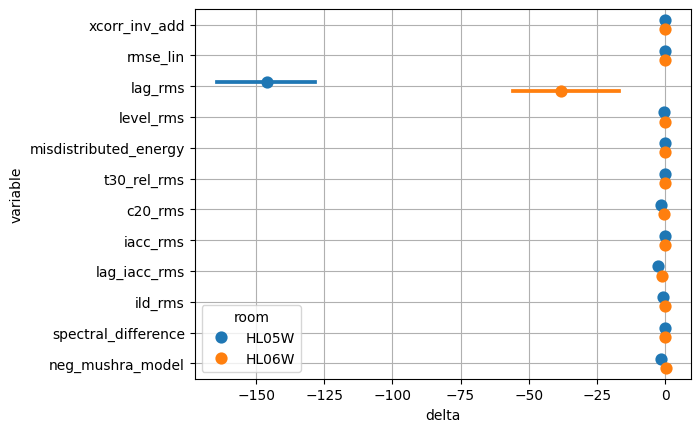

In [137]:
sns.pointplot(semi_melted, x="delta", y="variable", linestyle="none", hue="room", dodge=.3, hue_order=["HL05W", "HL06W"])#, log_scale=True)
grid(True)

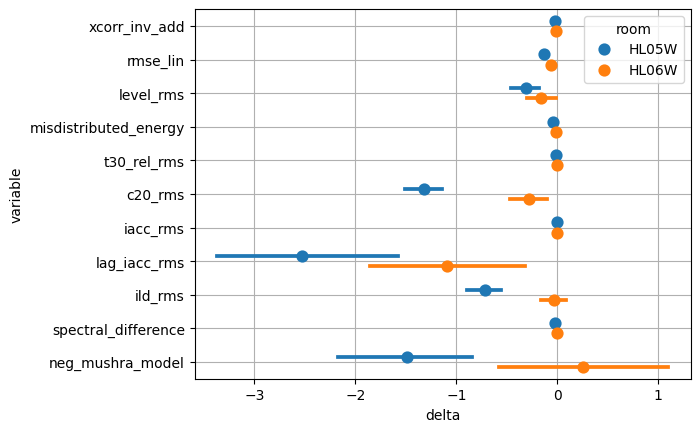

In [139]:
sns.pointplot(semi_melted.filter(pl.col("variable").eq("lag_rms").not_()), x="delta", y="variable", linestyle="none", hue="room", dodge=.3, hue_order=["HL05W", "HL06W"])#, log_scale=True)
grid(True)

Need different axis for each variable

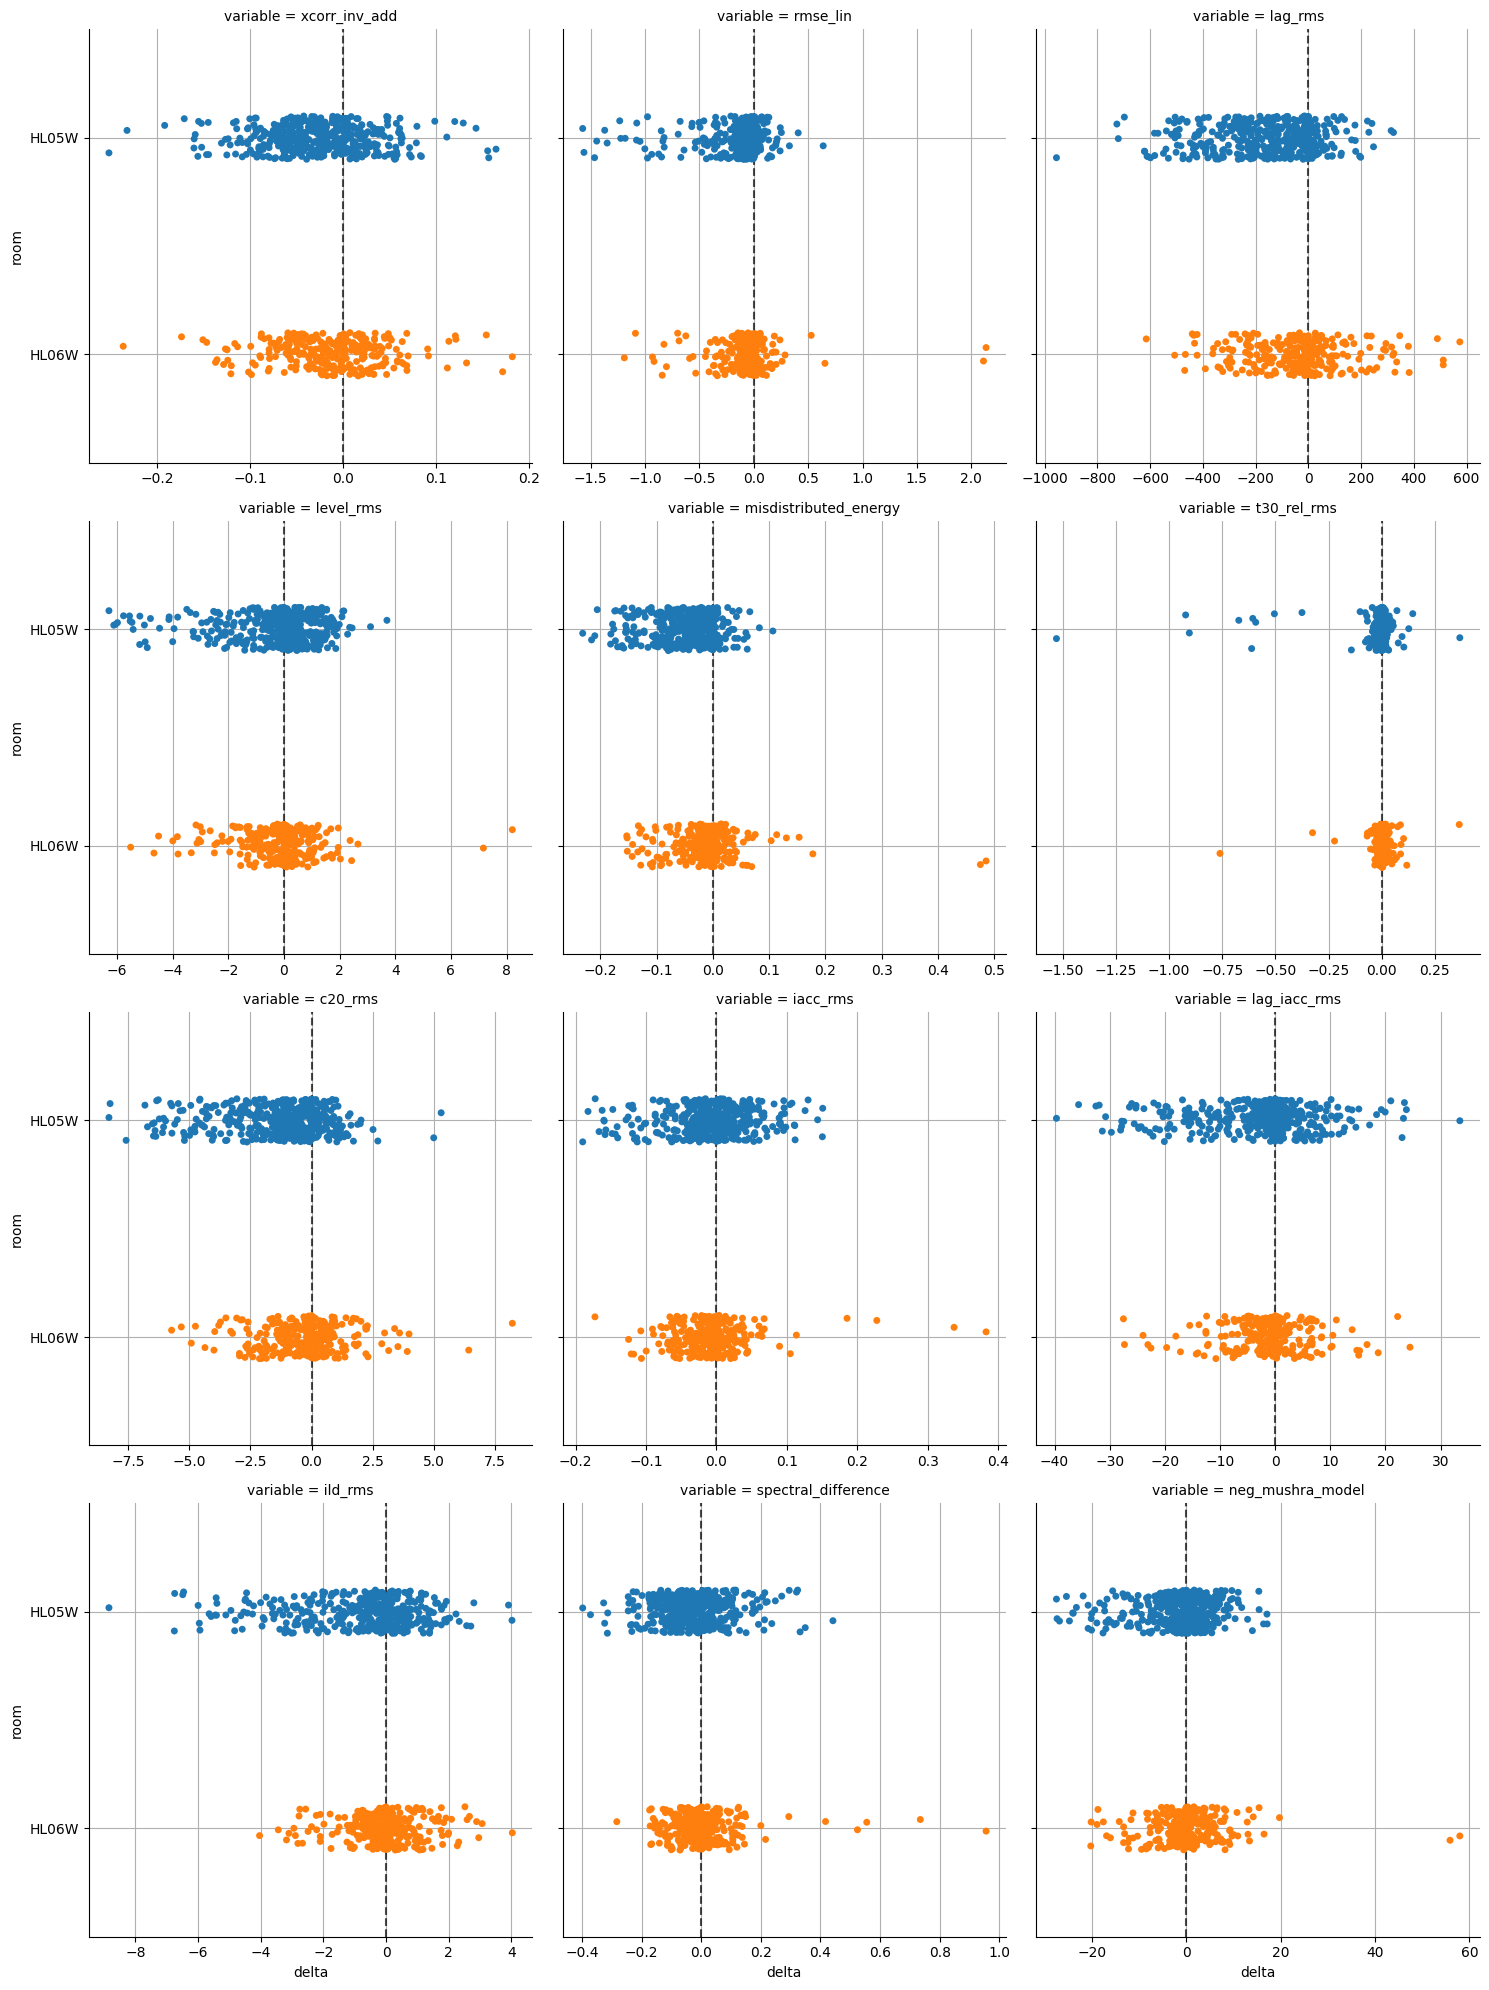

In [142]:
g = sns.catplot(
    semi_melted.to_pandas(),
    x="delta",
    y="room",
    col="variable",
    col_wrap=3,
    sharex=False,
    hue="room",
    kind="strip",
    hue_order=["HL05W", "HL06W"],
    order=["HL05W", "HL06W"],
)
#g.map(sns.stripplot, order=["HL05W", "HL06W"])
for ax in gcf().get_axes():
    ax.grid(True)
    #ax.set_aspect("equal")
    #ax.autoscale(False)
    #ax.plot([-1e4, 1e4], [-1e4, 1e4], color="black", alpha=.7, linestyle="--")
    ax.axvline(0, color="black", alpha=.7, linestyle="--")

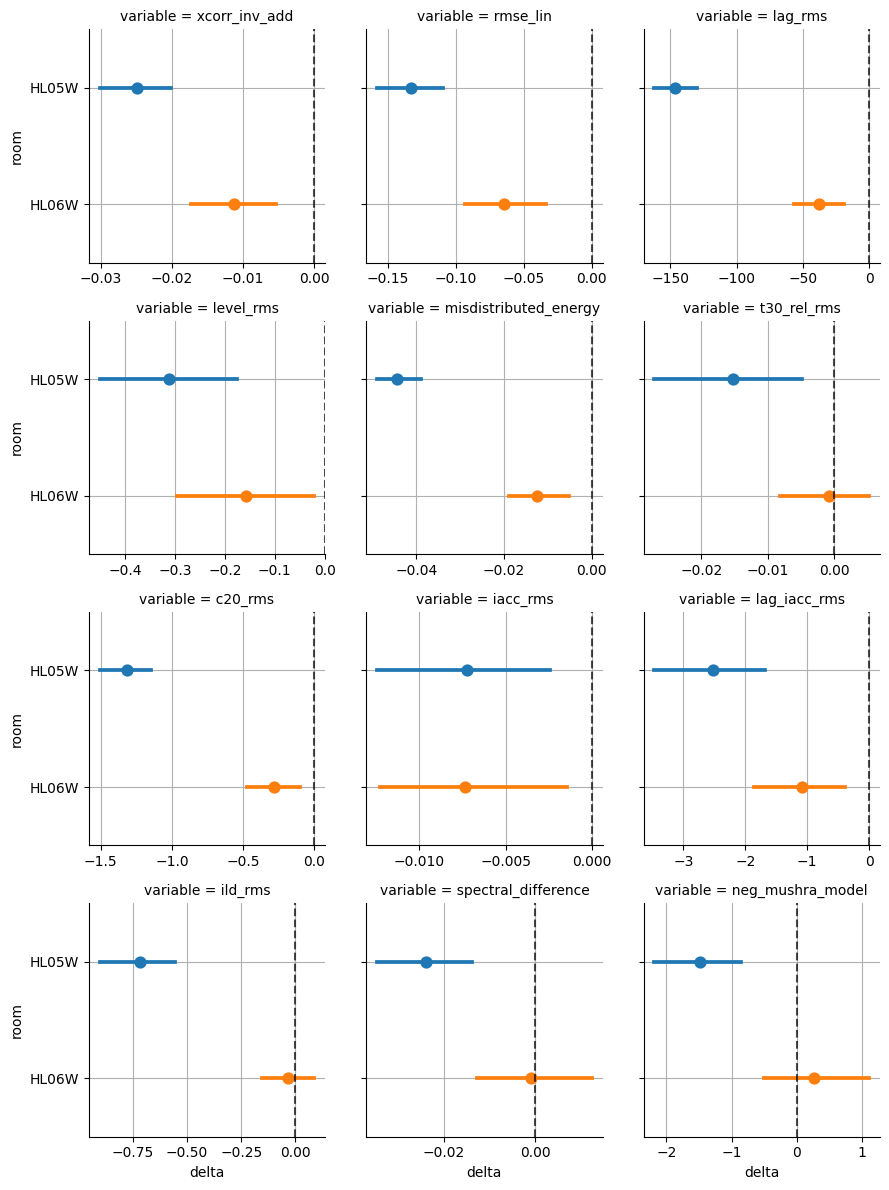

In [136]:
g = sns.FacetGrid(semi_melted.to_pandas(), 
    col="variable",
    col_wrap=3,
    sharex=False,hue="room", hue_order=["HL05W", "HL06W"])
#g.map(sns.boxplot, "delta", "room", order=["HL05W", "HL06W"], color="C0")
#g.map(sns.stripplot, "delta", "room", order=["HL05W", "HL06W"], alpha=.05, color="black", zorder=1)
g.map(sns.pointplot, "delta", "room", order=["HL05W", "HL06W"], linestyle="none", zorder=2)
for ax in gcf().get_axes():
    ax.grid(True)
    #ax.set_aspect("equal")
    #ax.autoscale(False)
    #ax.plot([-1e4, 1e4], [-1e4, 1e4], color="black", alpha=.7, linestyle="--")
    ax.axvline(0, color="black", alpha=.7, linestyle="--")

This is a pretty good plot. Is it better than p-values? Probably, since you can also see the CIs. 

TODO What about a table with 24 rows giving the same data (mean +- CI, p-value, Note on JND and range of values and effect size in JND or FS)

TODO What about citing percentage of cases where delta is negative? I think that is instructive as well.

What about median? Is that instructive? Not really. I'd rather have the number of cases < 0. 

In [165]:
semi_melted

room,from_listener,from_source,to_listener,to_source,variable,filtered,ds_only,delta
str,str,i32,str,i32,str,f64,f64,f64
"""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",1,"""xcorr_inv_add""",0.785557,0.631352,0.154206
"""HL05W""","""-1.25X_0.0Y""",4,"""0.0X_0.0Y""",1,"""xcorr_inv_add""",0.544153,0.619337,-0.075184
"""HL06W""","""1.75X_-2.0Y""",0,"""1.75X_-2.0Y""",2,"""xcorr_inv_add""",0.497726,0.467401,0.030325
"""HL06W""","""-1.75X_-3.0Y""",4,"""-1.75X_-3.0Y""",4,"""xcorr_inv_add""",0.164979,0.164979,0.0
"""HL05W""","""-1.75X_-3.0Y""",1,"""1.75X_-2.0Y""",4,"""xcorr_inv_add""",0.894126,0.901668,-0.007542
…,…,…,…,…,…,…,…,…
"""HL06W""","""3.0X_2.0Y""",1,"""-1.25X_0.0Y""",4,"""neg_mushra_mod…",-52.881187,-52.393293,-0.487895
"""HL06W""","""0.0X_0.0Y""",2,"""1.75X_-2.0Y""",3,"""neg_mushra_mod…",-64.439684,-64.412105,-0.027579
"""HL06W""","""1.75X_-2.0Y""",0,"""3.0X_2.0Y""",3,"""neg_mushra_mod…",-56.897758,-59.568196,2.670438


# Main result table

In [234]:
res_table = semi_melted.select(
    ["variable", "delta", "room", "ds_only", "filtered"]
).group_by(["variable", "room"]).agg(
    filtered_mean = pl.col("filtered").mean(),
    filtered_iqr = pl.col("filtered").quantile(.75) - pl.col("filtered").quantile(.25),
    delta_mean = pl.col("delta").mean(),
    p = pl.concat_list(pl.col("ds_only", "filtered")).map_elements(
        lambda list: scipy.stats.permutation_test(
            np.stack(list.to_numpy()).T,
            lambda x,y,axis: np.mean(y, axis=axis) - np.mean(x, axis=axis),
            permutation_type="samples",
        ).pvalue
    ),
    filtered_std = pl.col("filtered").std(),
    delta_mean_std = pl.col("delta").std() / pl.col("delta").count(),
    delta__mean_ci = pl.col("delta").map_elements(
        lambda list: scipy.stats.bootstrap(list.to_numpy().reshape(1,-1), np.mean).confidence_interval
    ),
    delta_negative_percentage = pl.col("delta").filter(pl.col("delta") < 0).count() / pl.col("delta").count(),
    filtered_mean_std = pl.col("filtered").std() / pl.col("filtered").count(),
    #filtered_median = pl.col("filtered").median(),
    #ds_only_mean = pl.col("ds_only").mean(),
).sort("room").sort("variable")
# TODO p-value of being zero (null hypothesis)
# TODO JND/FS column (one giving kind, one giving value)
# TODO relative effect size to JND or FS
with pl.Config(set_tbl_rows=100):
    display(res_table)

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


variable,room,filtered_mean,filtered_iqr,delta_mean,p,filtered_std,delta_mean_std,delta__mean_ci,delta_negative_percentage,filtered_mean_std
str,str,f64,f64,f64,f64,f64,f64,list[f64],f64,f64
"""c20_rms""","""HL05W""",3.082594,2.173401,-1.318337,0.0002,1.740293,0.004445,"[-1.499582, -1.139901]",0.777027,0.00392
"""c20_rms""","""HL06W""",4.717741,3.22236,-0.284359,0.0026,3.771549,0.005236,"[-0.45852, -0.103087]",0.542763,0.012406
"""iacc_rms""","""HL05W""",0.093465,0.068274,-0.007221,0.005,0.048548,0.000121,"[-0.012219, -0.002313]",0.533784,0.000109
"""iacc_rms""","""HL06W""",0.102091,0.057193,-0.007323,0.0102,0.058552,0.000166,"[-0.012342, -0.000896]",0.601974,0.000193
"""ild_rms""","""HL05W""",2.292916,1.715682,-0.719318,0.0002,1.425685,0.004046,"[-0.897136, -0.560664]",0.617117,0.003211
"""ild_rms""","""HL06W""",2.635233,2.171671,-0.035367,0.5848,1.551316,0.003604,"[-0.162675, 0.085918]",0.523026,0.005103
"""lag_iacc_rms""","""HL05W""",16.761539,25.857173,-2.524568,0.0002,13.847109,0.021897,"[-3.457545, -1.641938]",0.484234,0.031187
"""lag_iacc_rms""","""HL06W""",19.651449,18.901878,-1.090819,0.002,12.159661,0.021238,"[-1.820349, -0.379464]",0.542763,0.039999
"""lag_rms""","""HL05W""",227.687432,328.142398,-146.06377,0.0002,204.980683,0.422506,"[-164.204808, -129.230584]",0.77027,0.461668


# Test mean differences between rooms

In [278]:
res_table2 = semi_melted.select(
    ["variable", "room", "filtered"]
).pivot(
    values=["filtered"],
    index=["variable"],
    columns=["room"],
    aggregate_function= pl.element().list,
).with_columns(
    pl.col("HL06W", "HL05W").list.mean(),
    p = pl.struct("HL06W", "HL05W").map_elements(
        lambda struct: 
        scipy.stats.permutation_test(
            (struct["HL06W"], struct["HL05W"]),
            lambda x,y,axis: np.mean(y, axis=axis) - np.mean(x, axis=axis),
            permutation_type="independent",
        ).pvalue
    ),
    
).sort("variable")
# ).group_by(["variable", "room"]).agg(


with pl.Config(set_tbl_rows=100):
    display(res_table2)

sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


variable,HL06W,HL05W,p
str,f64,f64,f64
"""c20_rms""",4.717741,3.082594,0.0002
"""iacc_rms""",0.102091,0.093465,0.0314
"""ild_rms""",2.635233,2.292916,0.0012
"""lag_iacc_rms""",19.651449,16.761539,0.0064
"""lag_rms""",343.412768,227.687432,0.0002
"""level_rms""",2.723262,2.066071,0.0002
"""misdistributed…",0.245139,0.205427,0.0002
"""neg_mushra_mod…",-56.929114,-59.213071,0.0002
"""rmse_lin""",1.341414,1.268666,0.0008
